Problem 1 - Define the problem and perform Exploratory Data Analysis
# *- Problem definition - Check shape, Data types, statistical summary - *

# **Problem Definition:**

In the rapidly evolving landscape of digital marketing, it is crucial to optimize advertising strategies for maximum return on investment. This project aims to apply clustering techniques to a dataset of online advertisements, which includes various performance metrics and ad characteristics. The goal is to identify distinct groups of advertisements to better understand their performance patterns and influence factors such as ad size, type, platform, and device type. Insights derived from these clusters will guide strategic decisions, enabling more efficient budget allocation, improved ad targeting, and enhanced overall ad campaign effectiveness. The analysis will focus on optimizing ad performance, reducing costs by identifying and eliminating underperforming ads, and leveraging high-performing ad attributes across different segments.

The primary objective of this project is to apply clustering techniques to online advertising data in order to identify distinct groups or segments of advertisements based on their characteristics and observed performance metrics. By understanding these clusters, marketers can tailor their strategies to enhance ad performance, allocate budgets more efficiently, and improve overall campaign ROI.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset.

CPC = Total Cost (spend) / Number of Clicks. Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset.

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.


# **Check shape, Data types, statistical summary**

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('Clustering+Clean+Ads_Data (2).xlsx')


# Data Inspection
def inspect_data(data):
    print("Data Shape:", data.shape)
    print("Data Types:\n", data.dtypes)
    print("First Few Rows:\n", data.head())
    print("last few rows:\n",data.tail())
    print("Statistical Summary:\n", data.describe(include='all'))
    print("Unique values in each column:\n",data.nunique())
    print("Number of missing values in each column:\n", data.isnull().sum())

inspect_data(data)

Data Shape: (23066, 19)
Data Types:
 Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object
First Few Rows:
      Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  20

In [2]:
data.describe(include='all')

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066,23066,23066.000000,23066.000000,23066.000000,23066,23066,23066,23066,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
unique,2018,7,NaN,NaN,NaN,14,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-11-13-22,Format4,NaN,NaN,NaN,Inter224,Video,Mobile,Video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13,7165,NaN,NaN,NaN,1658,9873,14806,11552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,385.163097,337.896037,96674.468048,NaN,NaN,NaN,NaN,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,NaN,NaN,233.651434,203.092885,61538.329557,NaN,NaN,NaN,NaN,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,NaN,NaN,120.000000,70.000000,33600.000000,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,NaN,NaN,120.000000,250.000000,72000.000000,NaN,NaN,NaN,NaN,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,NaN,NaN,300.000000,300.000000,72000.000000,NaN,NaN,NaN,NaN,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,NaN,NaN,720.000000,600.000000,84000.000000,NaN,NaN,NaN,NaN,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


# **Treating null value using given method:**

**Note: Treat missing values in CPC, CTR and CPM using the formula given.**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def treat_missing_values(row):
    if pd.isnull(row['CPC']):
        row['CPC'] = row['Spend'] / row['Clicks']
    if pd.isnull(row['CTR']):
        row['CTR'] = (row['Clicks'] / row['Impressions']) * 100
    if pd.isnull(row['CPM']):
        row['CPM'] = (row['Spend'] / row['Impressions']) * 1000
    return row

# Apply the function to each row in the DataFrame
data = data.apply(treat_missing_values, axis=1)

# Verify if missing values are treated
print("Null Values After Treatment:")
print(data[['CPC', 'CTR', 'CPM']].isnull().sum())


Null Values After Treatment:
CPC    0
CTR    0
CPM    0
dtype: int64


In [5]:
data.describe(include='all')

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066,23066,23066.000000,23066.000000,23066.000000,23066,23066,23066,23066,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000
unique,2018,7,NaN,NaN,NaN,14,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-11-13-22,Format4,NaN,NaN,NaN,Inter224,Video,Mobile,Video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13,7165,NaN,NaN,NaN,1658,9873,14806,11552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,385.163097,337.896037,96674.468048,NaN,NaN,NaN,NaN,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,2.614863,8.396730,0.336652
std,NaN,NaN,233.651434,203.092885,61538.329557,NaN,NaN,NaN,NaN,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,7.853405,9.057082,0.341231
min,NaN,NaN,120.000000,70.000000,33600.000000,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,NaN,NaN,120.000000,250.000000,72000.000000,NaN,NaN,NaN,NaN,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.003400,1.750000,0.090000
50%,NaN,NaN,300.000000,300.000000,72000.000000,NaN,NaN,NaN,NaN,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.112650,8.370742,0.140000
75%,NaN,NaN,720.000000,600.000000,84000.000000,NaN,NaN,NaN,NaN,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.183778,13.040000,0.550000


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.000000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.000000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.000000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.000000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.500000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.000000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.000000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.125000,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.350000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.335000,2.091338e+03,21276.18


**Check for duplicates**

In [7]:
data.duplicated().sum()

0

# **Univariete Analysis**

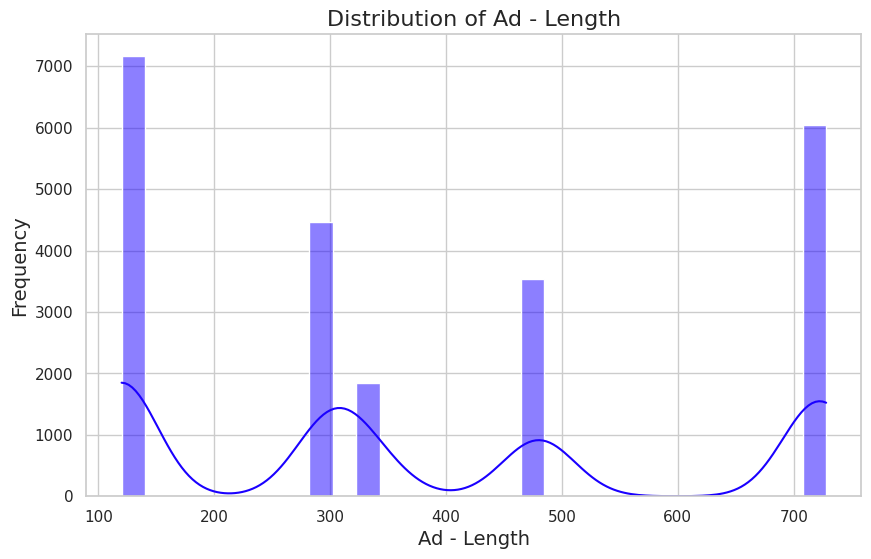

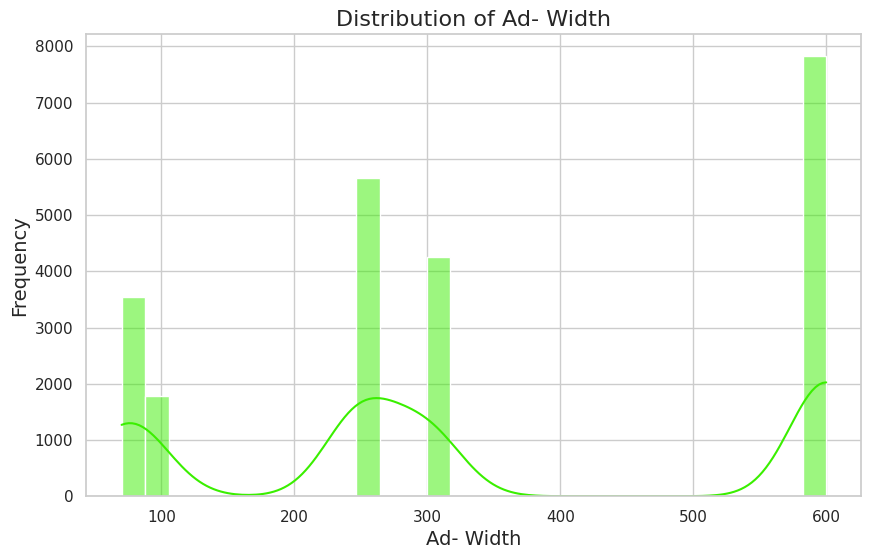

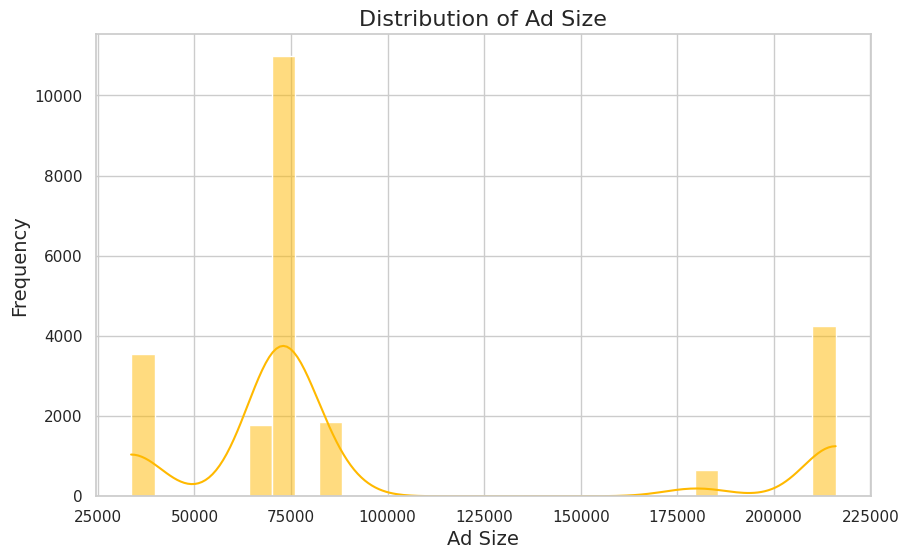

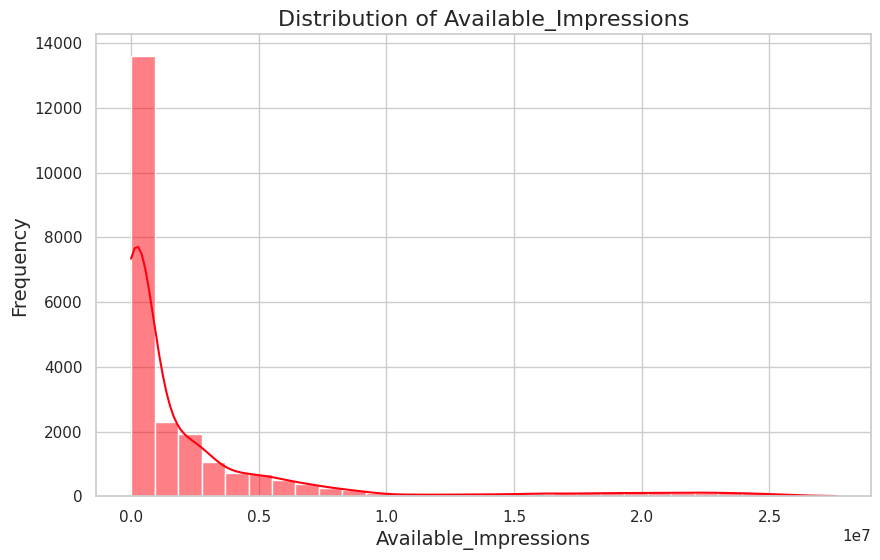

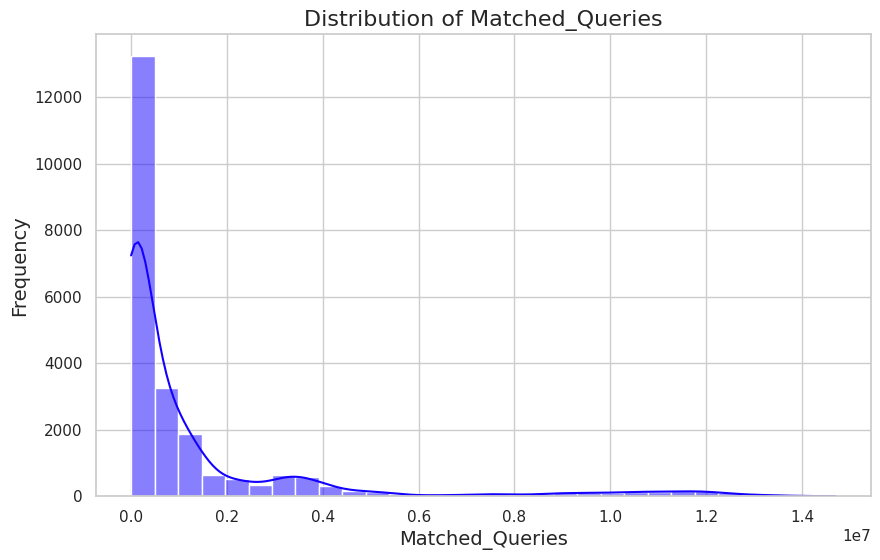

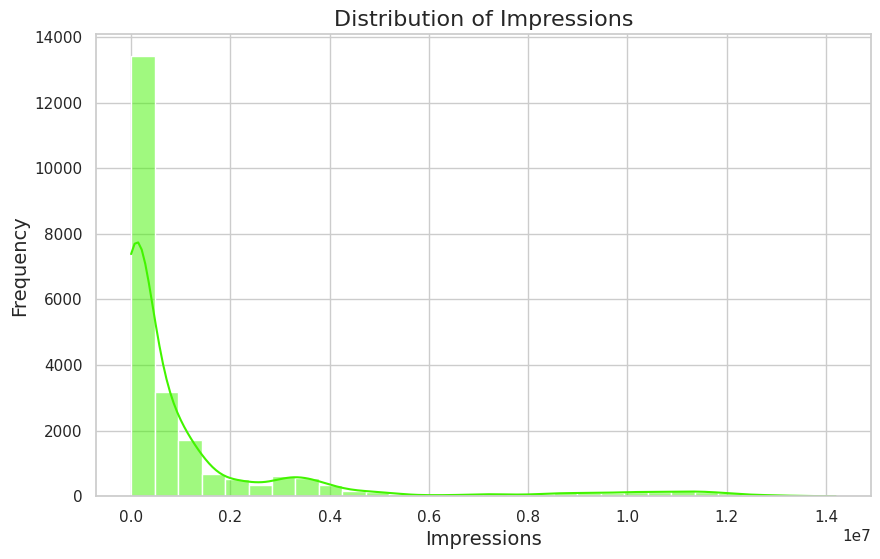

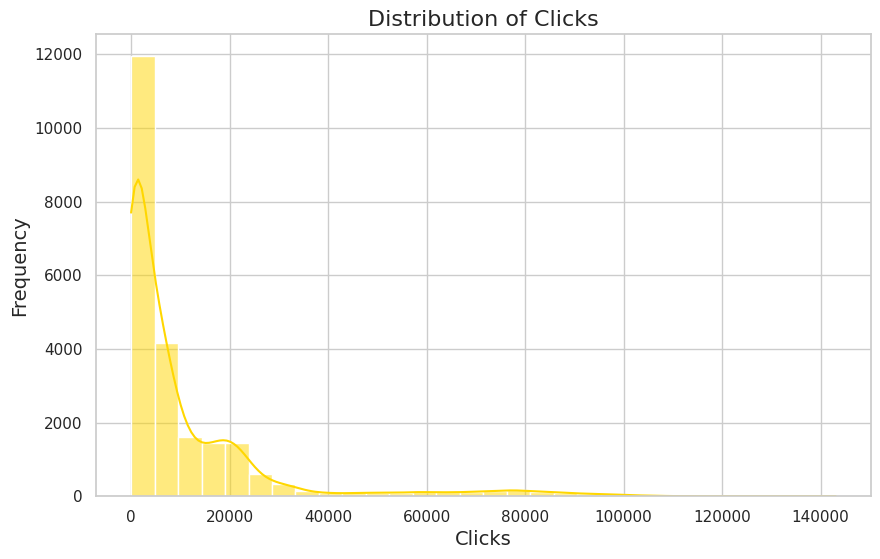

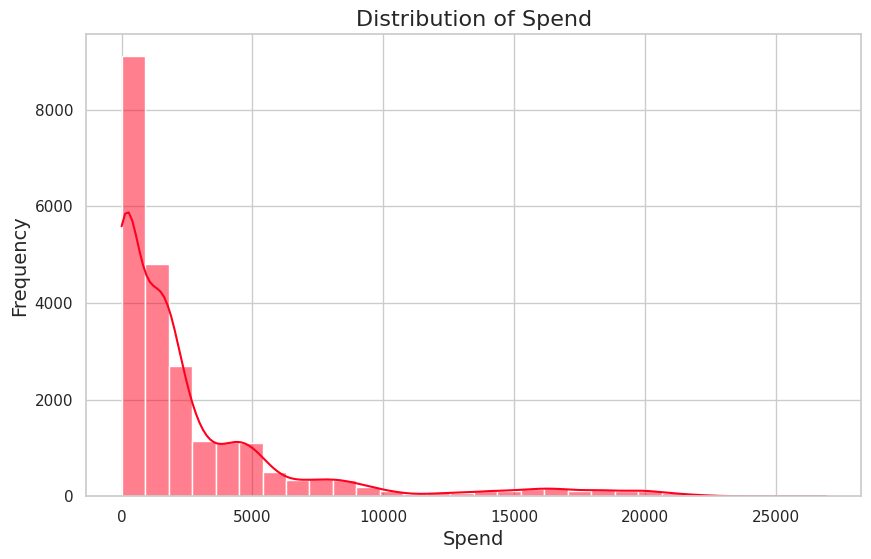

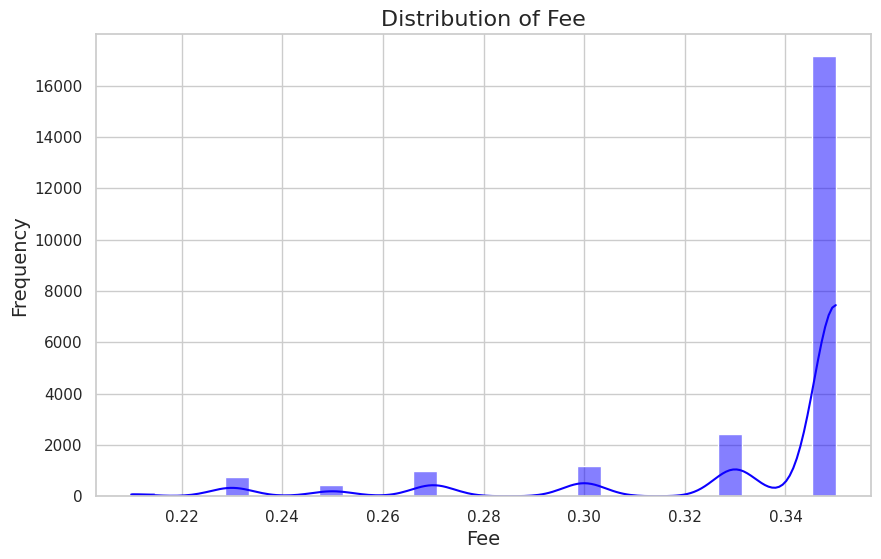

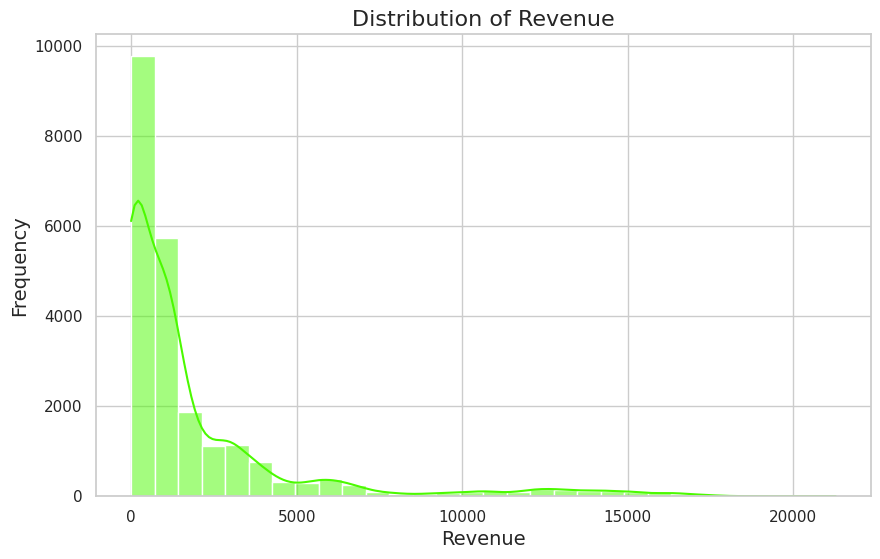

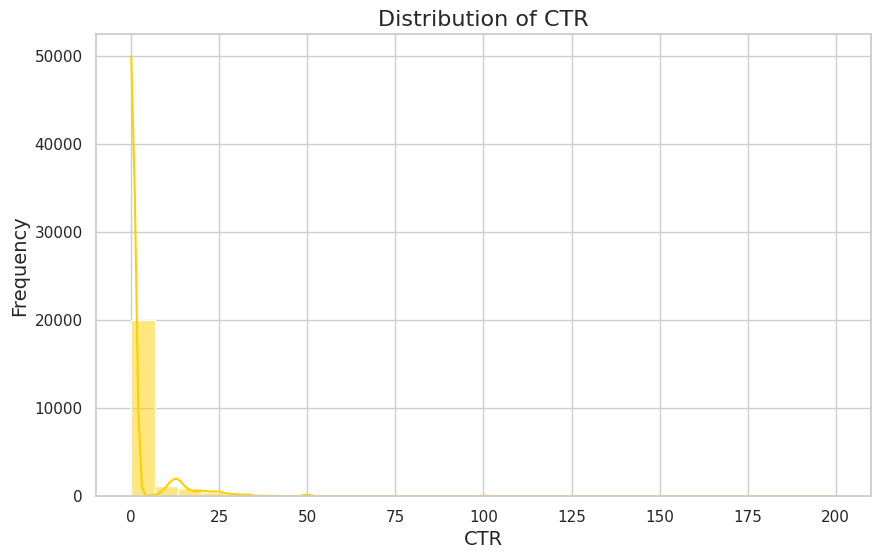

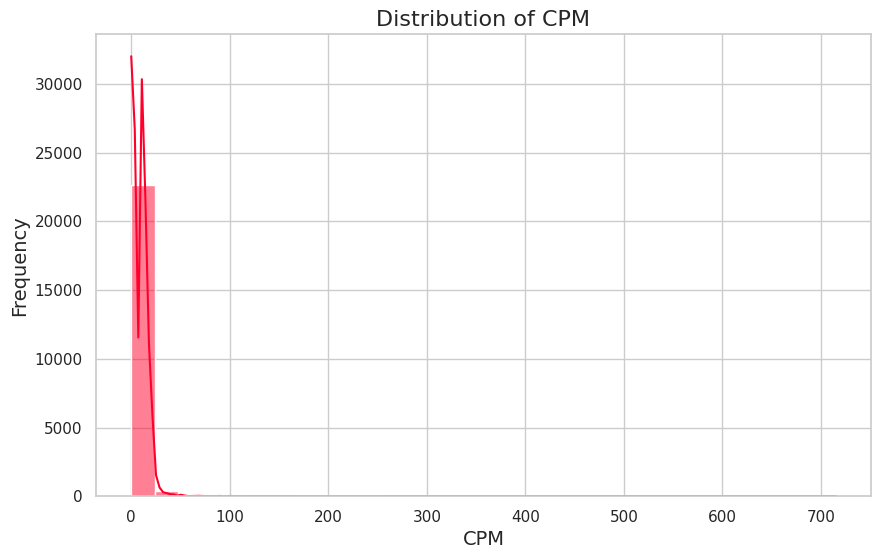

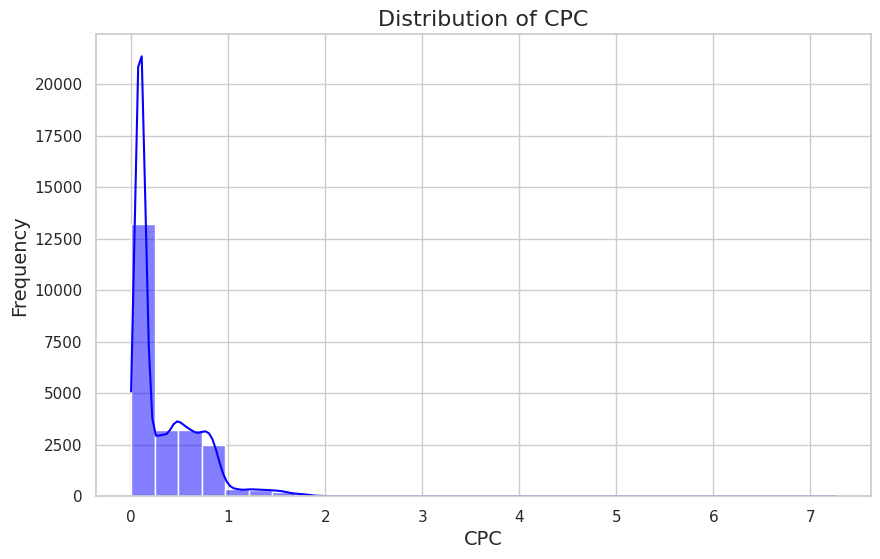

<ipython-input-8-fdec0740e41c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palette)


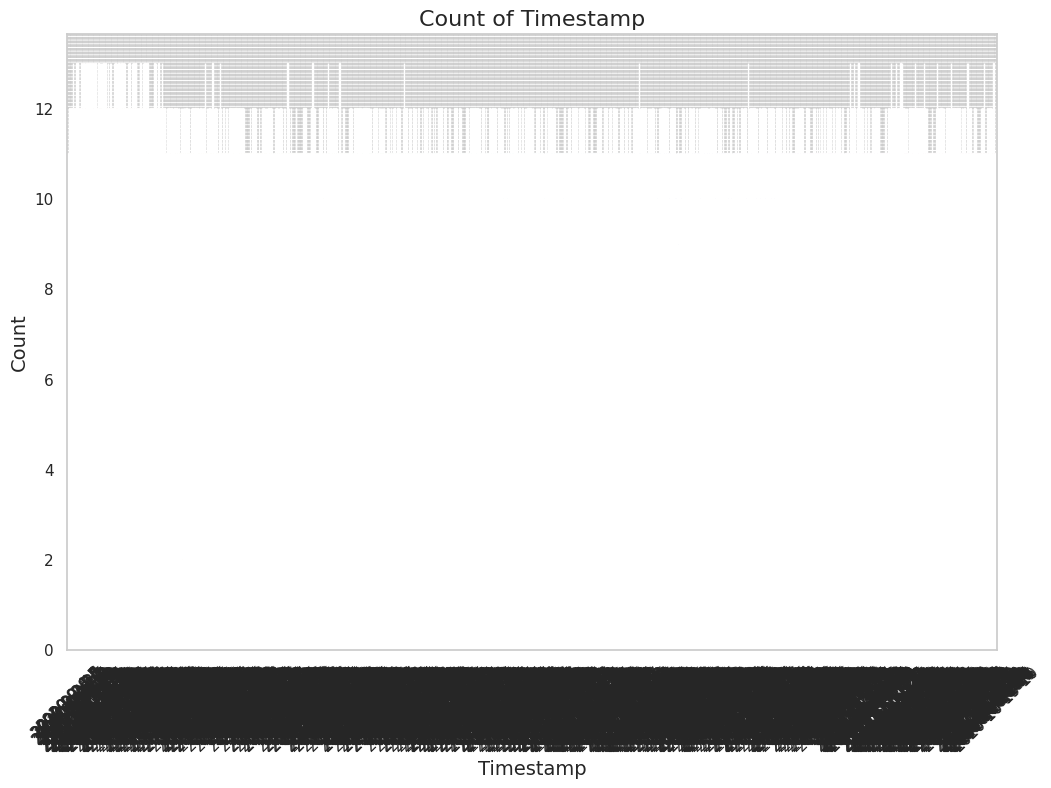

<ipython-input-8-fdec0740e41c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palette)


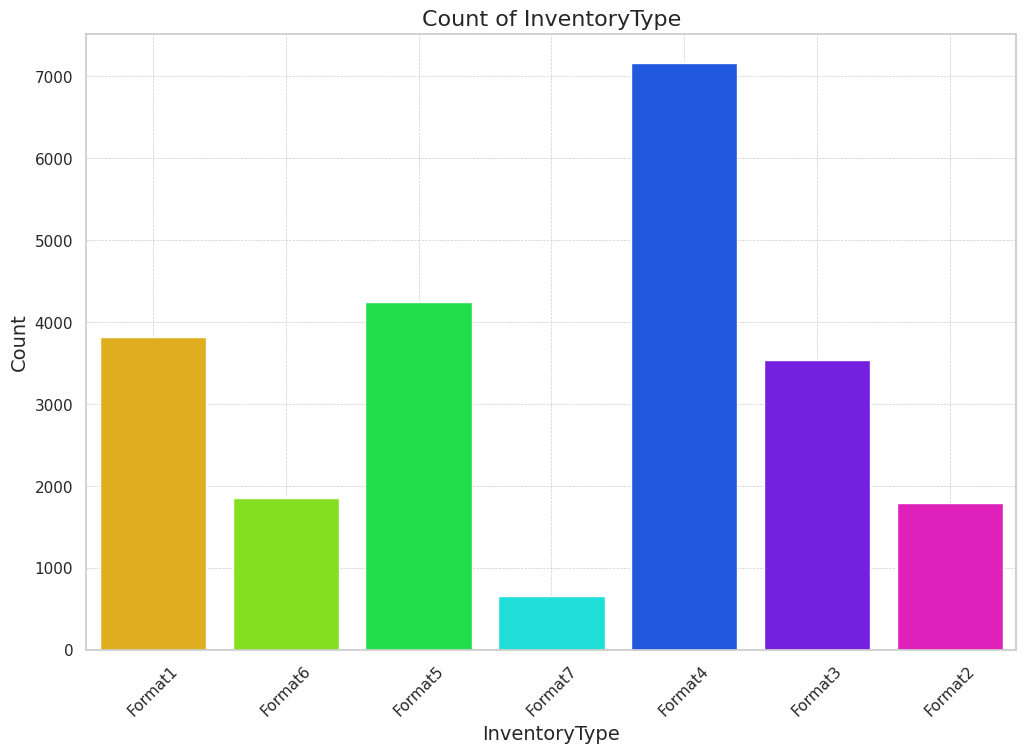

<ipython-input-8-fdec0740e41c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palette)


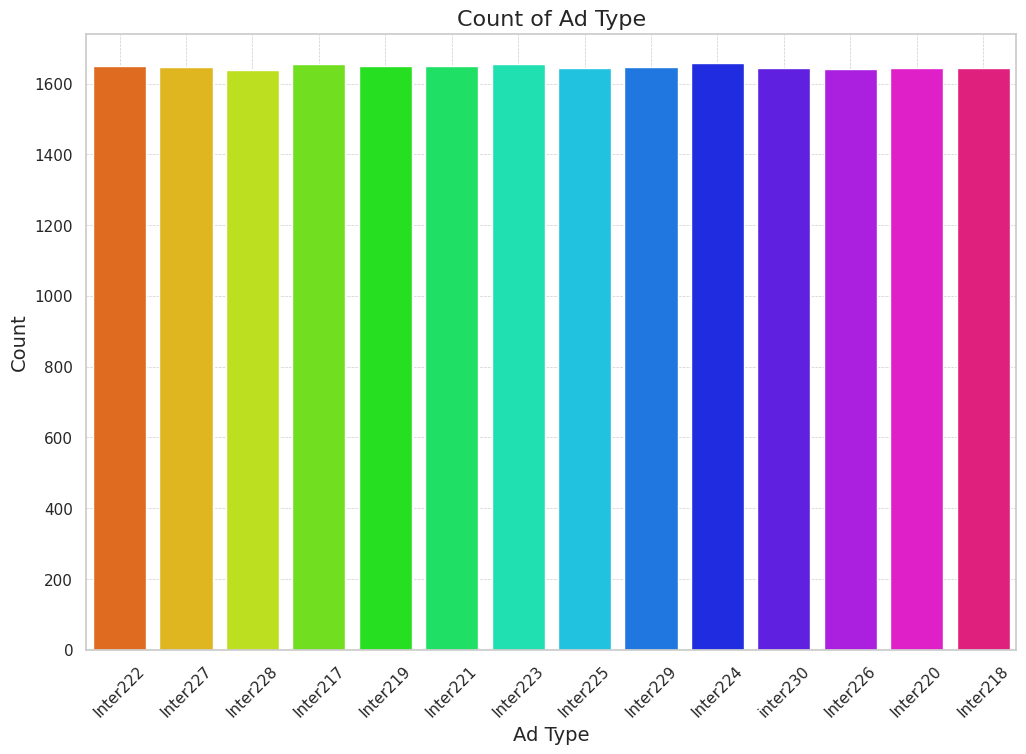

<ipython-input-8-fdec0740e41c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palette)


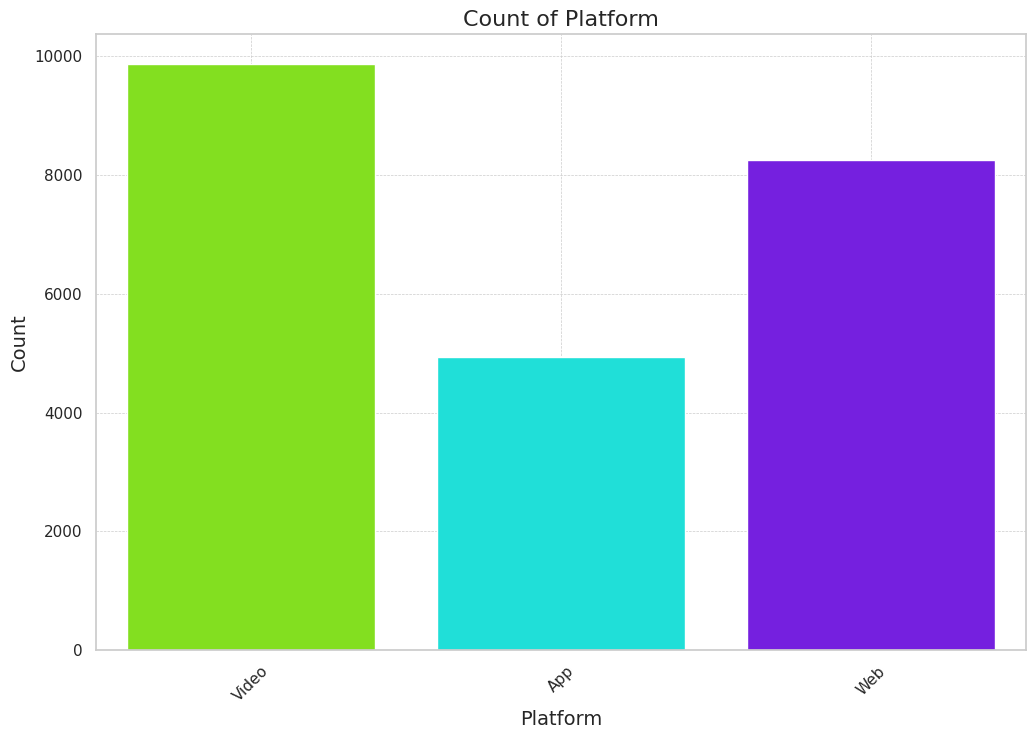

<ipython-input-8-fdec0740e41c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palette)


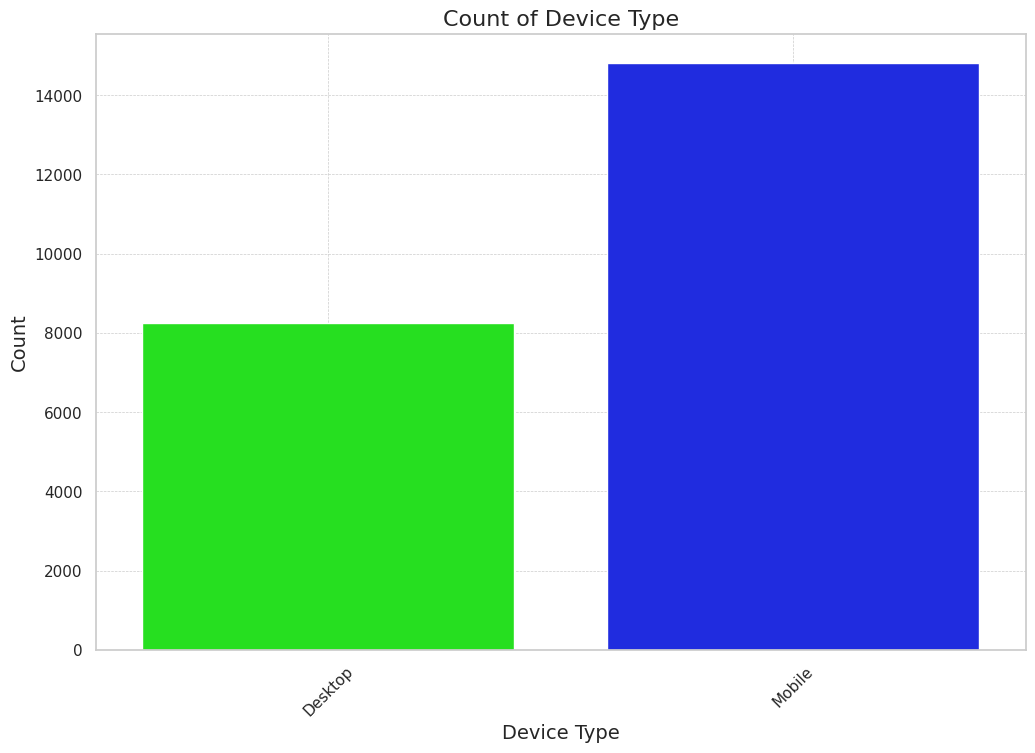

<ipython-input-8-fdec0740e41c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palette)


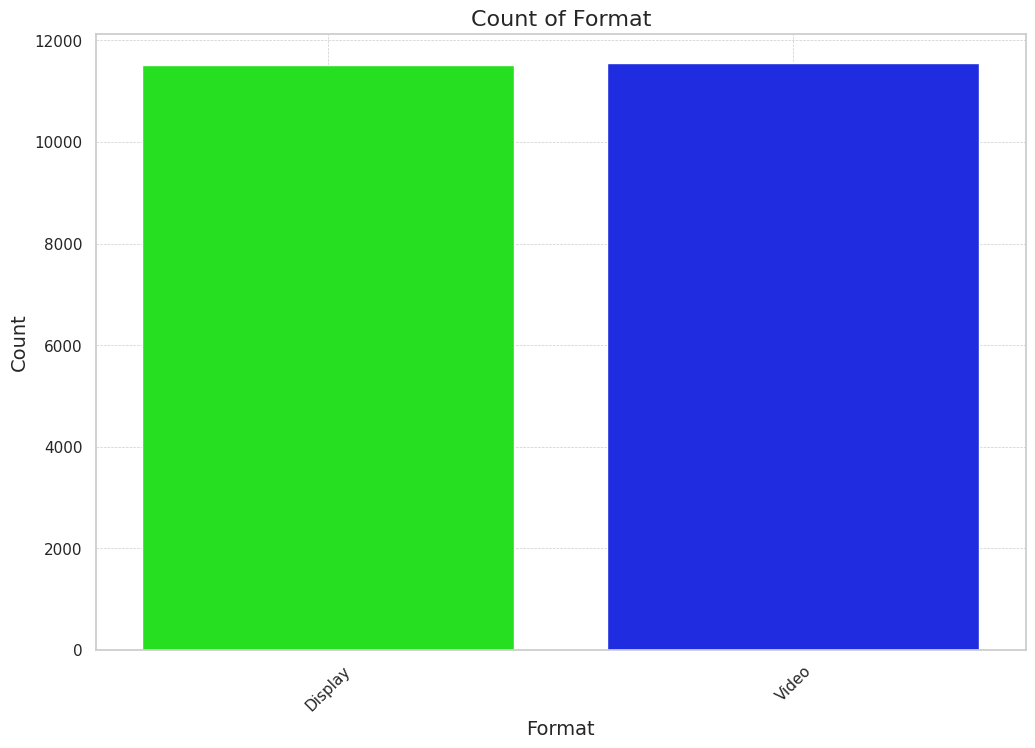

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Univariate Analysis
def univariate_analysis(data):

    sns.set(style="whitegrid")

    # Identifying numerical and categorical variables
    numerical_vars = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_vars = data.select_dtypes(include=['object']).columns

    # Define a vibrant color palette for numerical variables
    vibrant_colors = sns.color_palette("prism", len(numerical_vars))

    # Plot distributions for numerical variables
    for idx, var in enumerate(numerical_vars):
        plt.figure(figsize=(10, 6))
        sns.histplot(data[var], bins=30, kde=True, color=vibrant_colors[idx])
        plt.title(f'Distribution of {var}', fontsize=16)
        plt.xlabel(var, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(True)  # Adding grid for better readability
        plt.show()

    # Define a vibrant color palette for categorical variables
    category_colors = sns.color_palette("tab20", len(categorical_vars))

    # Plot counts for categorical variables
    for idx, var in enumerate(categorical_vars):

        plt.figure(figsize=(12, 8))
        unique_categories = data[var].nunique()
        palette = sns.color_palette("hsv", unique_categories)
        sns.countplot(x=var, data=data, palette=palette)
        plt.title(f'Count of {var}', fontsize=16)
        plt.xlabel(var, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.show()

univariate_analysis(data)

# **Bivariete Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis
def bivariate_analysis(data):
    sns.set(style="whitegrid")

    # Identifying numerical and categorical variables
    numerical_vars = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_vars = data.select_dtypes(include=['object']).columns

    # Numerical vs Numerical variables
    scatter_colors = sns.color_palette("bright", len(numerical_vars))
    num_vars_len = len(numerical_vars)
    num_pairs = num_vars_len * (num_vars_len - 1) // 2
    rows = (num_pairs + 2) // 3  # Calculating number of rows needed for 3 columns, rounded up if needed
    plt.figure(figsize=(18, 6 * max(1, rows)))  # Ensure there's at least one row
    fig_index = 1
    for i in range(num_vars_len):
        for j in range(i + 1, num_vars_len):
            if fig_index <= rows * 3:  # Check within valid subplot index
                plt.subplot(rows, 3, fig_index)
                sns.scatterplot(x=numerical_vars[i], y=numerical_vars[j], data=data,
                                color=scatter_colors[i % len(scatter_colors)], alpha=0.6, edgecolor='white', s=50)
                plt.title(f'{numerical_vars[i]} vs {numerical_vars[j]}')
                plt.xlabel(numerical_vars[i])
                plt.ylabel(numerical_vars[j])
                fig_index += 1
    plt.tight_layout()
    plt.show()

    # Categorical vs Numerical variables
    for cat_var in categorical_vars:
        num_cat_plots = len(numerical_vars)
        plt.figure(figsize=(18, 6))  # Fixed size suitable for three plots per row
        for i, num_var in enumerate(numerical_vars):
            if i < 3:  # Ensure no more than three plots per row
                plt.subplot(1, 3, i + 1)
                sns.boxplot(x=cat_var, y=num_var, data=data)
                plt.title(f'{num_var} by {cat_var}')
                plt.xlabel(cat_var)
                plt.ylabel(num_var)
                plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

bivariate_analysis(data)

Output hidden; open in https://colab.research.google.com to view.

# **Key meaningful observations on individual variables**

In [8]:
import numpy as np


def key_observations(data):
    # Print basic statistics for numerical data
    print("Basic Statistics for Numerical Data:\n", data.describe())


    numeric_data = data.select_dtypes(include=[np.number])

    # Calculate the correlation matrix for numeric data only
    correlation_matrix = numeric_data.corr()
    print("Correlation Matrix:\n", correlation_matrix)

    # Additional insightful observations
    print("\nKey Observations:")
    # Observation on Ad Sizes
    print("- The most common Ad Sizes might indicate standard industry practices or more popular formats.")

    # High correlation observations
    if data['Spend'].corr(data['Impressions']) > 0.7:
        print("- Spend strongly correlates with Impressions, indicating that higher investments generally lead to more visibility.")

    if data['CTR'].corr(data['Revenue']) > 0.5:
        print("- Higher CTR correlates with increased Revenue, suggesting that ads which attract more clicks also generate more income, emphasizing the importance of engaging content.")

    # Platform specific observations
    platform_ctr = data.groupby('Platform')['CTR'].mean()
    print(f"- Average CTR by Platform:\n{platform_ctr}")
    max_platform = platform_ctr.idxmax()
    print(f"- {max_platform} has the highest average CTR, suggesting it might be the most effective platform for engaging ads.")

    # Device type observations
    device_impressions = data.groupby('Device Type')['Impressions'].mean()
    print(f"- Average Impressions by Device Type:\n{device_impressions}")
    max_device = device_impressions.idxmax()
    print(f"- {max_device} generally shows the most impressions, indicating higher traffic or ad visibility on this type of device.")

# Execute the function
key_observations(data)

Basic Statistics for Numerical Data:
         Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   96674.468048           2.432044e+06   
std      233.651434    203.092885   61538.329557           4.742888e+06   
min      120.000000     70.000000   33600.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  216000.000000           2.759286e+07   

       Matched_Queries   Impressions         Clicks         Spend  \
count     2.306600e+04  2.306600e+04   23066.000000  23066.000000   
mean      1.295099e+06  1.241520e+06   10678.518816   2706.625689   
std       2.512970e+06  2.429400e+06   17353.409363   4067.927273   
min       

# **Relationship between variables**

Correlation Matrix:
                        Ad - Length  Ad- Width   Ad Size  \
Ad - Length               1.000000  -0.705374  0.542391   
Ad- Width                -0.705374   1.000000  0.110318   
Ad Size                   0.542391   0.110318  1.000000   
Available_Impressions     0.300895  -0.410493 -0.203853   
Matched_Queries           0.295007  -0.397779 -0.197089   
Impressions               0.293065  -0.398370 -0.197462   
Clicks                   -0.005791   0.157888  0.116659   
Spend                     0.248295  -0.274170 -0.144912   
Fee                      -0.138311   0.147269  0.169713   
Revenue                   0.247679  -0.264931 -0.144502   
CTR                      -0.069729   0.250371  0.150148   
CPM                      -0.226355   0.547443  0.246470   
CPC                       0.250022  -0.550970 -0.335144   

                       Available_Impressions  Matched_Queries  Impressions  \
Ad - Length                         0.300895         0.295007     0.293065

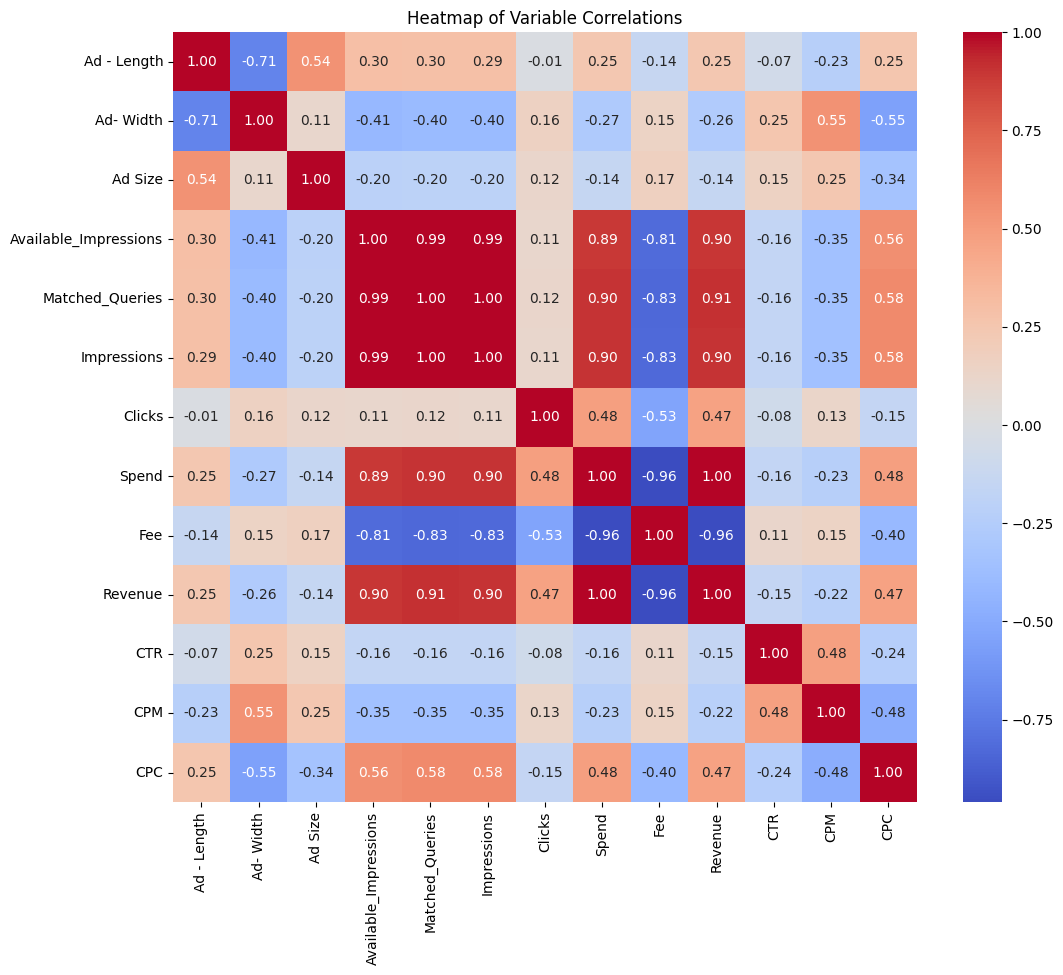

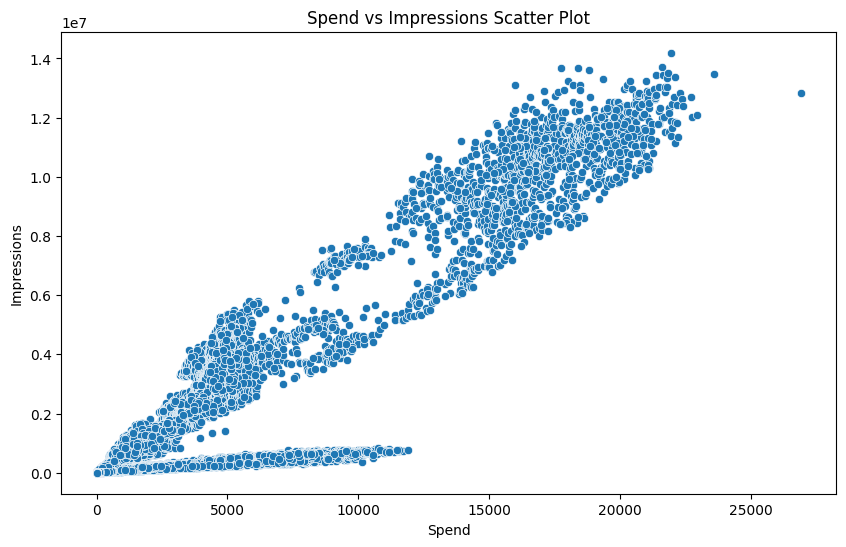

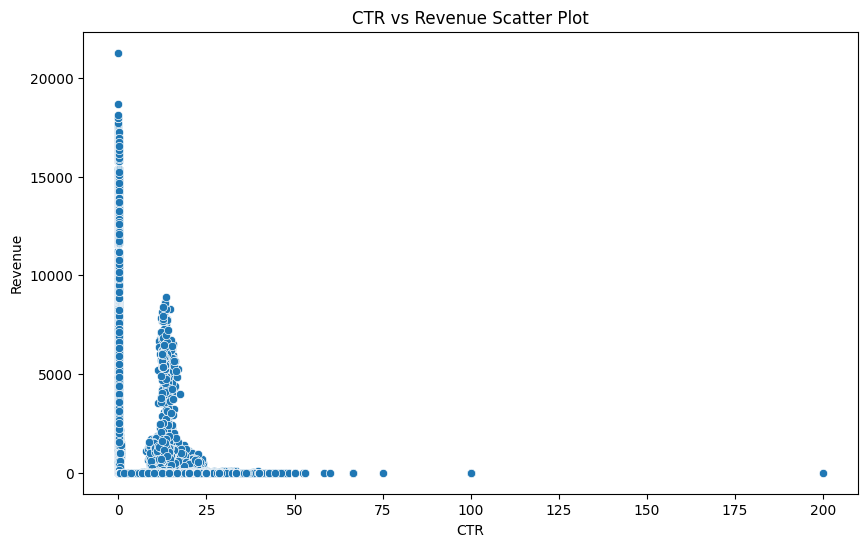

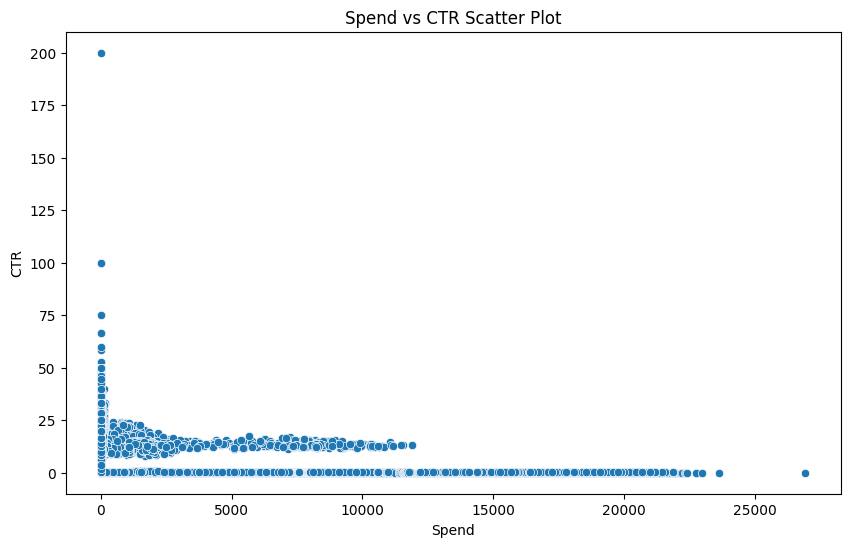

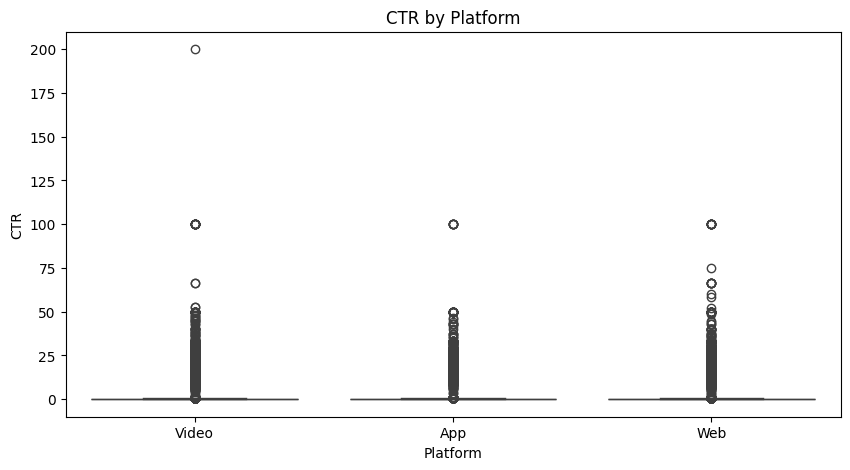

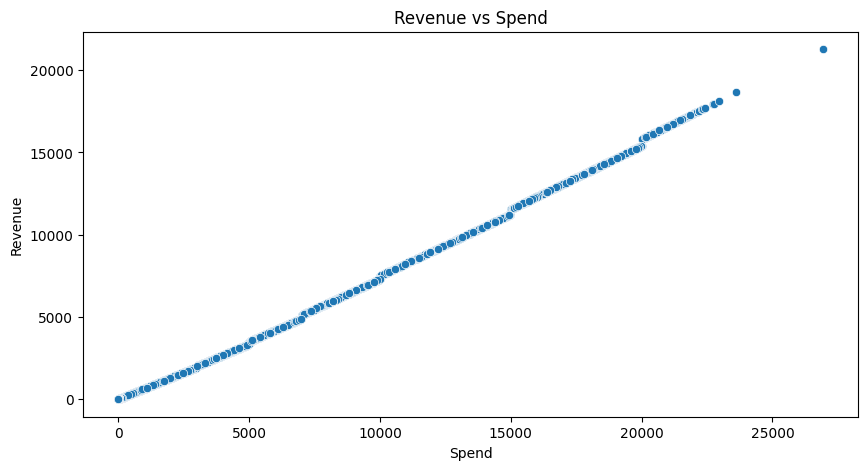

In [9]:
import numpy as np

# Function to compute and visualize the relationships between variables
def analyze_relationships(data):
    # Filter out non-numeric columns
    numeric_data = data.select_dtypes(include=[np.number])

    # Calculate the correlation matrix for numeric data only
    correlation_matrix = numeric_data.corr()
    print("Correlation Matrix:\n", correlation_matrix)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Heatmap of Variable Correlations')
    plt.show()

    # Scatter plots for key variable pairs
    key_pairs = [('Spend', 'Impressions'), ('CTR', 'Revenue'), ('Spend', 'CTR')]
    for x, y in key_pairs:
        if x in numeric_data.columns and y in numeric_data.columns:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=x, y=y, data=numeric_data)
            plt.title(f'{x} vs {y} Scatter Plot')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()

     # CTR by Platform
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Platform', y='CTR', data=data)
    plt.title('CTR by Platform')
    plt.xlabel('Platform')
    plt.ylabel('CTR')
    plt.show()

    # Revenue vs Spend
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='Spend', y='Revenue', data=data)
    plt.title('Revenue vs Spend')
    plt.xlabel('Spend')
    plt.ylabel('Revenue')
    plt.show()

# Call the function
analyze_relationships(data)

# **Problem 1 - Data Preprocessing**
**- Missing value check and treatment - Outlier Treatment - z-score scaling Note: Treat missing values in CPC, CTR and CPM using the formula given.**

Missing value check and treatment : using the formula given

In [10]:
import pandas as pd
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# Define the function to treat missing values
def treat_missing_values(row):
    if pd.isnull(row['CPC']) or row['CPC'] == 0:
        if row['Clicks'] != 0:
            row['CPC'] = row['Spend'] / row['Clicks']
    if pd.isnull(row['CTR']) or row['CTR'] == 0:
        if row['Impressions'] != 0:
            row['CTR'] = (row['Clicks'] / row['Impressions']) * 100
    if pd.isnull(row['CPM']) or row['CPM'] == 0:
        if row['Impressions'] != 0:
            row['CPM'] = (row['Spend'] / row['Impressions']) * 1000
    return row

# Apply the function to each row in the DataFrame
data = data.apply(treat_missing_values, axis=1)

# Verify if missing values are treated
print("Null Values After Treatment:")
print(data[['CPC', 'CTR', 'CPM']].isnull().sum())


Null Values After Treatment:
CPC    0
CTR    0
CPM    0
dtype: int64


**Outlier detection and Treatment**

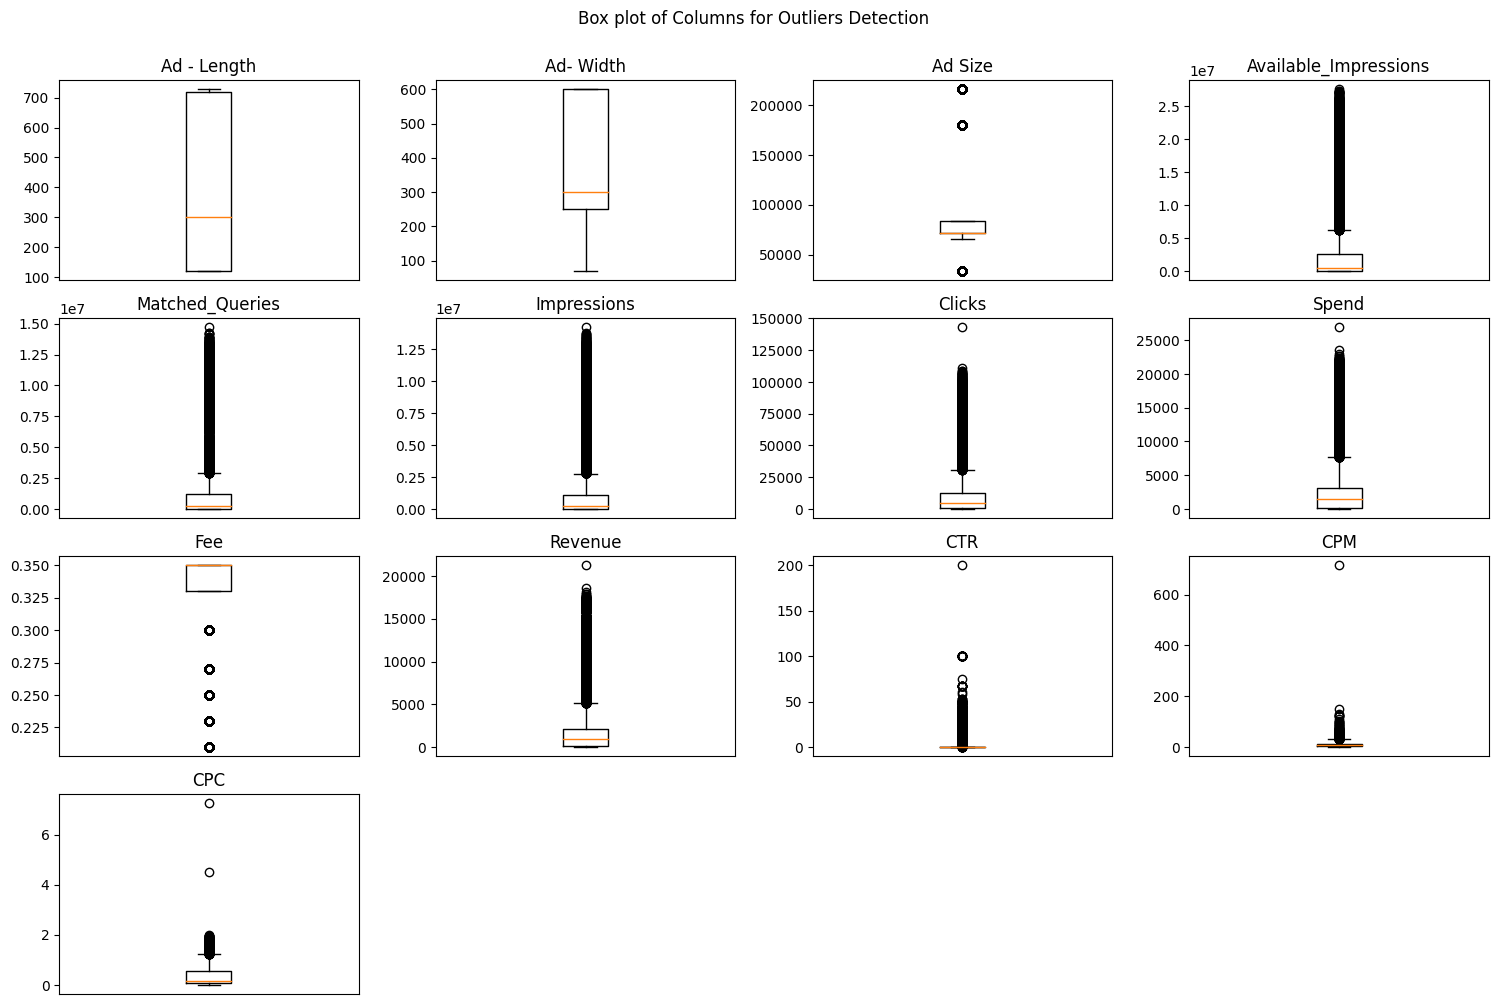

In [11]:
# Select columns for outlier detection
columns_for_outliers = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
                        'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee',
                        'Revenue', 'CTR', 'CPM', 'CPC']

# Create separate box plots for each selected column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_for_outliers, start=1):
    plt.subplot(4, 4, i)
    plt.boxplot(data[column])
    plt.title(column)
    plt.xticks([])
plt.suptitle('Box plot of Columns for Outliers Detection', y=1)
plt.tight_layout()
plt.show()


# **After Outlier treatement**

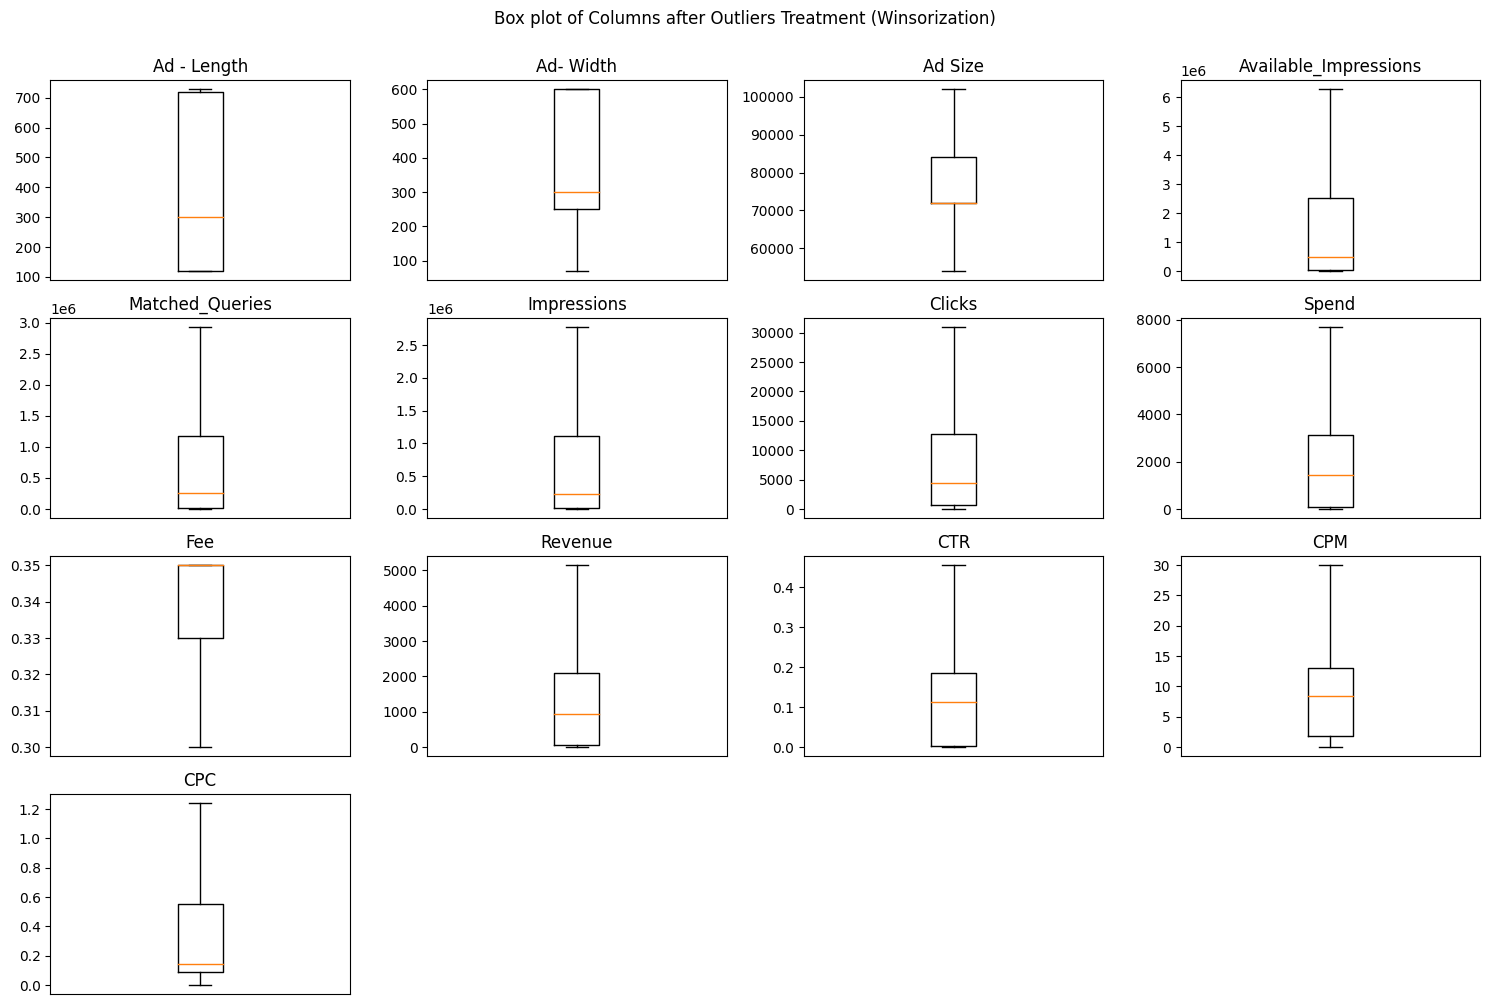

In [12]:
# Define function for Winsorization
def winsorize(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where(column < lower_bound, lower_bound, np.where(column > upper_bound, upper_bound, column))

# Apply Winsorization to each selected column
for column in columns_for_outliers:
    data[column] = winsorize(data[column])

# Verify if outliers are treated
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_for_outliers, start=1):
    plt.subplot(4, 4, i)
    plt.boxplot(data[column])
    plt.title(column)
    plt.xticks([])
plt.suptitle('Box plot of Columns after Outliers Treatment (Winsorization)', y=1)
plt.tight_layout()
plt.show()


# **z-score scaling**

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Select numerical columns for z-score scaling
numerical_columns = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
                     'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee',
                     'Revenue', 'CTR', 'CPM', 'CPC']

# Apply z-score scaling to numerical columns
scaler = StandardScaler()
scaled = scaler.fit_transform(data[numerical_columns])

# Verify the scaled data
scaled

array([[-0.3644957 , -0.43279676, -0.10251846, ..., -0.89120141,
        -1.19456185, -1.04114166],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.88861451,
        -1.19456185, -1.04114166],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.89314159,
        -1.19456185, -1.04114166],
       ...,
       [ 1.43309269, -0.18659865,  1.65289551, ...,  2.02710758,
         3.16201634, -0.88350577],
       [-1.13489073,  1.29058999, -0.29756446, ...,  2.02710758,
         3.16201634, -0.82045141],
       [ 1.43309269, -0.18659865,  1.65289551, ...,  2.02710758,
         3.16201634, -0.75739705]])

# **Data Shape after Outlier Removal**

In [14]:

print("\nData Shape after Outlier Removal:")
print(data.shape)
data.head()


Data Shape after Outlier Removal:
(23066, 19)


,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.0041,0.0,0.0


# **Problem 1 - Hierarchical Clustering**
# - Construct a dendrogram using Ward linkage and Euclidean distance - Identify the optimum number of Clusters

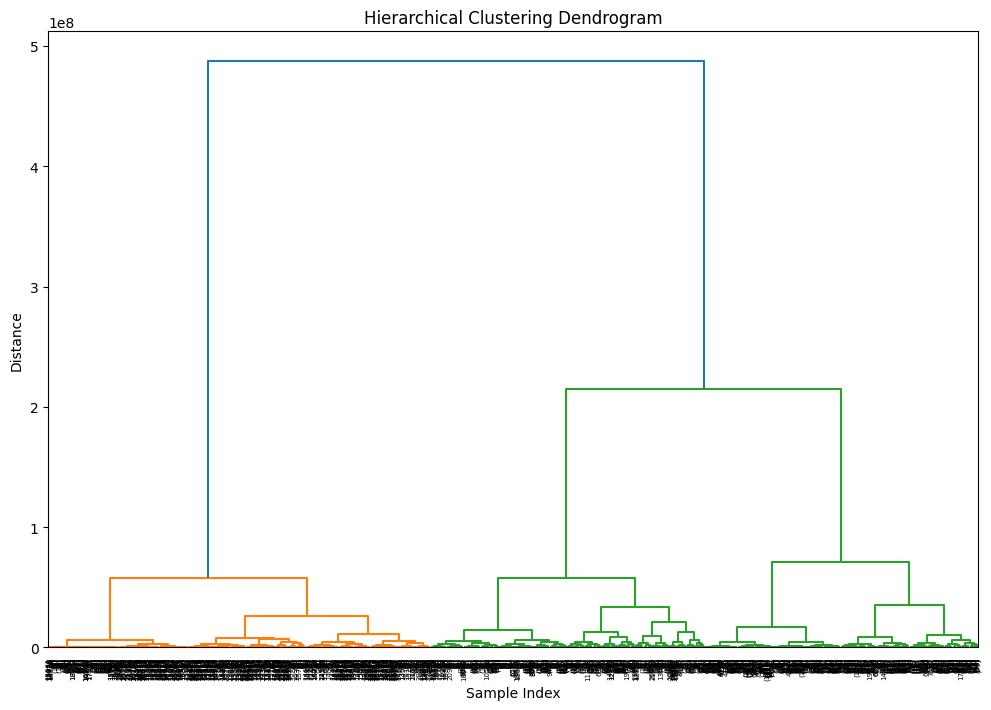

In [15]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Extract numerical features for clustering
numerical_columns = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
                     'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee',
                     'Revenue', 'CTR', 'CPM', 'CPC']

# Ward's linkage method
wardlink = linkage(data[numerical_columns], method='ward', metric='euclidean')

# Construct the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(wardlink, truncate_mode='level', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# **Dendrogram only for p value mentioned**

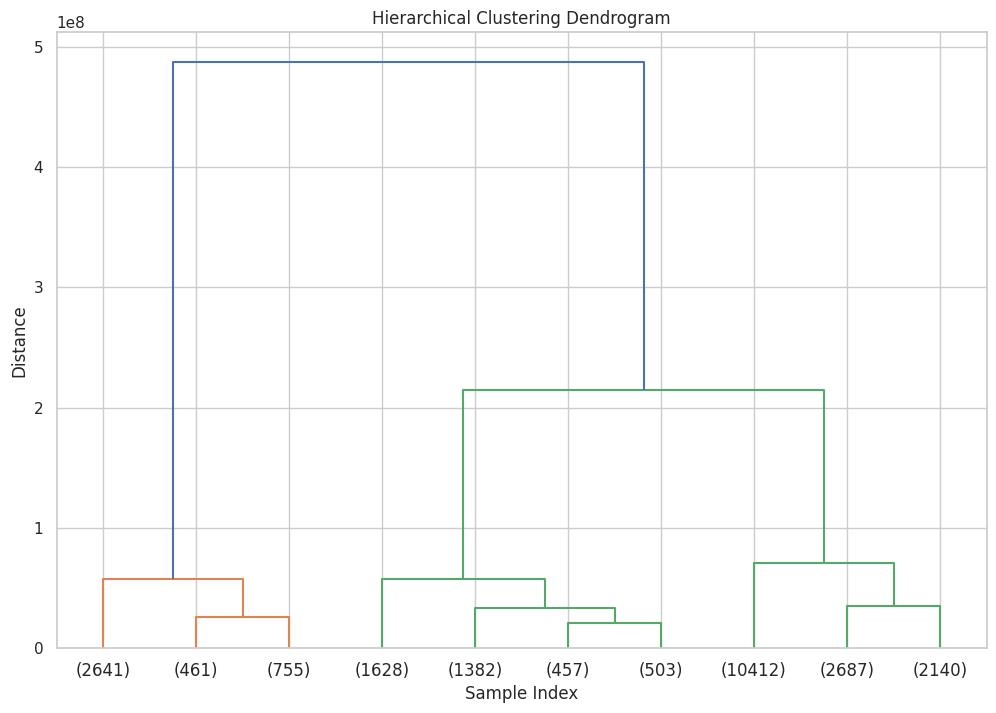

In [ ]:
# Construct the dendrogram for only p value mentioned
plt.figure(figsize=(12, 8))
dendrogram(wardlink, truncate_mode='lastp', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
data_clusters = data.copy()
data_clusters['clusters'] = clusters
data_clusters.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
0,2020-9-2-17,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.0031,0.0,0.0,2
1,2020-9-2-10,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.0035,0.0,0.0,2
2,2020-9-1-22,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.0028,0.0,0.0,2
3,2020-9-3-20,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.0020,0.0,0.0,2
4,2020-9-4-15,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.0041,0.0,0.0,2


# **Problem 1 - K-means Clustering**
## - Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out the appropriate number of clusters - Cluster Profiling

Cluster Count: 2, Inertia: 187902.64796084116, Silhouette Score: 0.40318728190110503
Cluster Count: 3, Inertia: 139992.9553574643, Silhouette Score: 0.34546490473813013
Cluster Count: 4, Inertia: 105294.07712658145, Silhouette Score: 0.40329230744536865
Cluster Count: 5, Inertia: 72133.66303894582, Silhouette Score: 0.48020206445747665
Cluster Count: 6, Inertia: 62259.9453993075, Silhouette Score: 0.47614006110191004
Cluster Count: 7, Inertia: 55151.50115909382, Silhouette Score: 0.4688308580303041
Cluster Count: 8, Inertia: 49712.882377146576, Silhouette Score: 0.4321632225751021
Cluster Count: 9, Inertia: 44876.13256606515, Silhouette Score: 0.41424475903360874
Cluster Count: 10, Inertia: 41186.09655270549, Silhouette Score: 0.43027285167432744


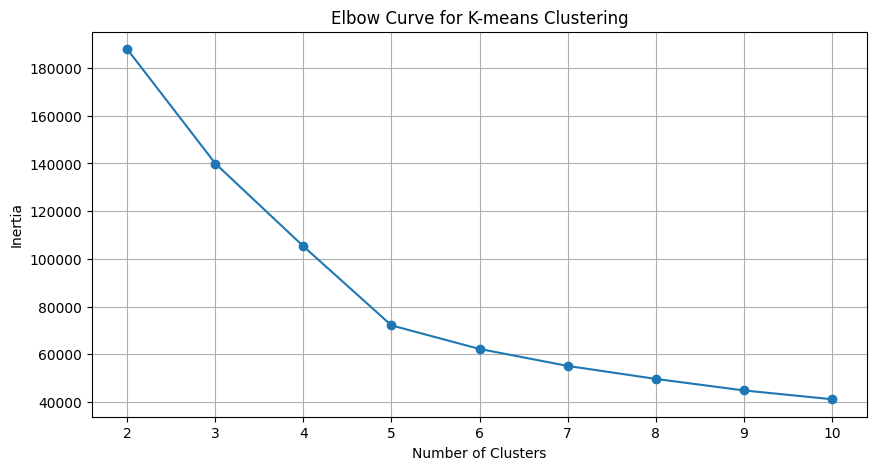

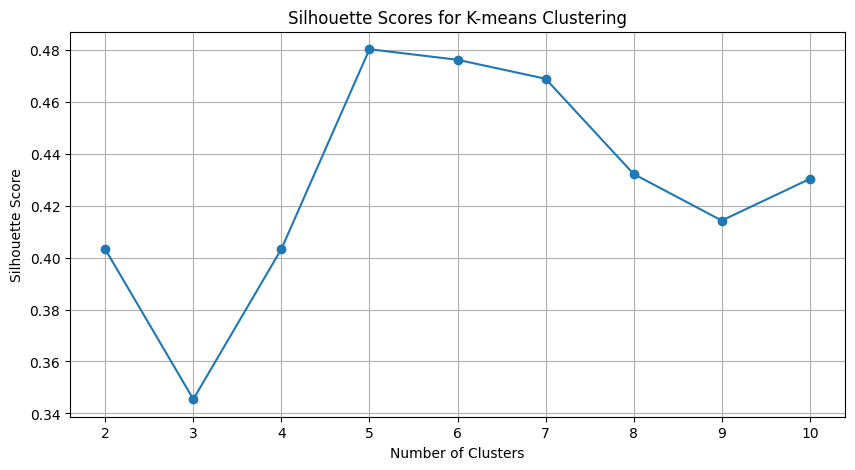

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Range of cluster numbers to try
range_n_clusters = range(2, 11)

# Apply K-means clustering for each cluster number
for n_clusters in range_n_clusters:
    # Explicitly setting n_init to 10 to suppress the future warning
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(scaled)

    # Compute inertia (within-cluster sum of squared distances)
    inertia_values.append(kmeans.inertia_)

    # Compute silhouette score
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Cluster Count: {n_clusters}, Inertia: {kmeans.inertia_}, Silhouette Score: {silhouette_avg}")

# Plot the Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Curve for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Plot the Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


# **Cluster Profiling**

In [17]:
optimal_n_clusters = 5
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(scaled)

# Cluster Profiling
# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Now you can analyze the clusters by examining the characteristics of each cluster
cluster_profiles = data.groupby('Cluster')[numerical_columns].mean()
print(cluster_profiles)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Ad - Length   Ad- Width        Ad Size  Available_Impressions  \
Cluster                                                                  
0         682.020434  305.246914  100785.440613           2.626464e+05   
1         424.491285  146.212738   63789.216485           1.838534e+06   
2         141.543860  572.482131   73703.703704           8.055940e+05   
3         465.880958  199.212151   72970.432205           5.697675e+06   
4         146.047282  568.378256   74136.726397           3.651906e+04   

         Matched_Queries   Impressions        Clicks        Spend       Fee  \
Cluster                                                                       
0           1.416907e+05  1.207011e+05  14085.454848  1254.130773  0.349544   
1           8.785389e+05  8.399883e+05   3304.896563  1524.260050  0.349234   
2           5.663903e+05  4.777502e+05  30562.689571  6541.996751  0.305601   
3           2.807234e+06  2.672181e+06  11253.998024  5742.133729  0.313255   
4      

# **Creating Clusters using KMeans**

Inertia for 1 clusters: 299857.99999999965
Inertia for 2 clusters: 187902.64796084116
Inertia for 3 clusters: 139992.83581148635
Inertia for 4 clusters: 106152.69867213002
Inertia for 5 clusters: 72133.64978232082
Inertia for 6 clusters: 62259.9453993075


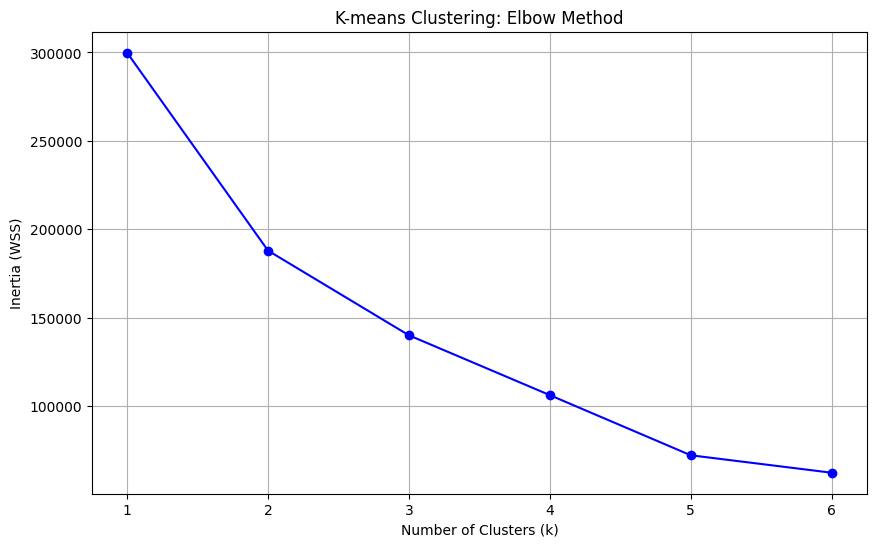

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Specified cluster counts
cluster_counts = [1, 2, 3, 4, 5, 6]

# Initialize lists to store inertia values
inertia_values = []

# Apply K-means clustering for each specified number of clusters, setting n_init explicitly
for k in cluster_counts:
    # Here n_init is explicitly set to 10 to suppress the future warning
    k_means = KMeans(n_clusters=k, n_init=10, random_state=1)
    k_means.fit(scaled)
    inertia_values.append(k_means.inertia_)
    print(f"Inertia for {k} clusters: {k_means.inertia_}")

# Plotting the inertia values to observe the Elbow
plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, inertia_values, marker='o', linestyle='-', color='b')
plt.title('K-means Clustering: Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WSS)')
plt.xticks(cluster_counts)
plt.grid(True)
plt.show()


**WSS reduces as K is increased**

WSS for 1 clusters: 299857.99999999965
WSS for 2 clusters: 187902.64796084116
WSS for 3 clusters: 139992.9553574643
WSS for 4 clusters: 105294.07712658145
WSS for 5 clusters: 72133.66303894582
WSS for 6 clusters: 62259.9453993075
WSS for 7 clusters: 55151.50115909382
WSS for 8 clusters: 49712.882377146576
WSS for 9 clusters: 44876.13256606515
WSS for 10 clusters: 41186.09655270549
WSS for 11 clusters: 38181.86760200062
WSS for 12 clusters: 35642.910365737276
WSS for 13 clusters: 33340.734474308
WSS for 14 clusters: 31306.237231812018


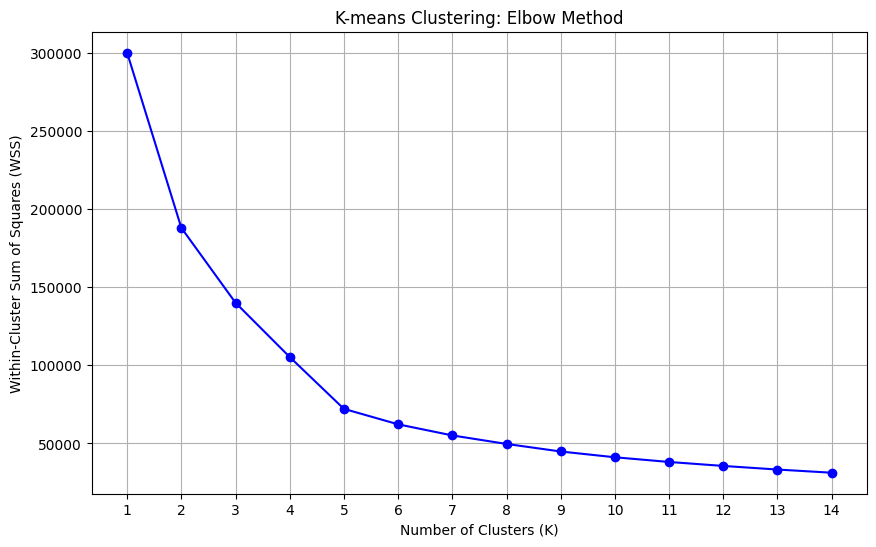

In [19]:
#Select numerical_columns for clustering (adjust this based on your dataset)
numerical_data = data.select_dtypes(include=[np.number])

# Define the range of clusters to calculate WSS
range_k = range(1, 15)

# Initialize a list to store the WSS for each K
wss = []

# Perform K-means clustering for each K in the range and calculate WSS
for k in range_k:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaled)
    wss.append(kmeans.inertia_)
    print(f"WSS for {k} clusters: {kmeans.inertia_}")

# Plotting the WSS values to visualize the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_k, wss, marker='o', linestyle='-', color='b')
plt.title('K-means Clustering: Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(range_k)
plt.grid(True)
plt.show()

# **Silhouette score for 3,4,5 clusters**

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
labels = kmeans.fit_predict(scaled)

In [25]:
# Calculating silhouette_score
silhouette_score(scaled,labels,random_state=1)

0.45977258417301853

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import numpy as np


numerical_data = data.select_dtypes(include=[np.number])  # Select only numerical columns

# Scale the numerical data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numerical_data)

# Dictionary to hold cluster labels for each K
cluster_labels = {}

# Perform K-means clustering for K = 3, 4, 5 and calculate silhouette scores
ks = [3, 4, 5]
silhouette_scores = {}

for k in ks:
    k_means = KMeans(n_clusters=k, n_init=10, random_state=1)  # Explicitly setting n_init=10
    k_means.fit(scaled_df)
    labels = k_means.labels_
    cluster_labels[k] = labels
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_df, labels)
    silhouette_scores[k] = silhouette_avg
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")


Silhouette Score for 3 clusters: 0.38230765438062264
Silhouette Score for 4 clusters: 0.46195914305611296
Silhouette Score for 5 clusters: 0.5254744481864043


**silhouette score is better for 5 clusters than for 4 clusters. So, final clusters will be 5**

***Adding Clusters to the original dataset***

In [27]:
data["Clus_kmeans"] = labels
data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster,Clus_kmeans
0,2020-9-2-17,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,1806.0,...,323.0,1.0,0.0,0.35,0.0,0.0031,0.0,0.0,1,2
1,2020-9-2-10,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,1780.0,...,285.0,1.0,0.0,0.35,0.0,0.0035,0.0,0.0,1,2
2,2020-9-1-22,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,2727.0,...,355.0,1.0,0.0,0.35,0.0,0.0028,0.0,0.0,1,2
3,2020-9-3-20,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,2430.0,...,495.0,1.0,0.0,0.35,0.0,0.0020,0.0,0.0,1,2
4,2020-9-4-15,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,1218.0,...,242.0,1.0,0.0,0.35,0.0,0.0041,0.0,0.0,1,2


# **Cluster Profiling**

In [28]:
data.Clus_kmeans.value_counts().sort_index()

Clus_kmeans
0    6641
1    4049
2    6139
3    4698
4    1539
Name: count, dtype: int64

In [29]:
clust_profile=data.drop(['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=data.Clus_kmeans.value_counts().sort_index()
clust_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster,freq
Clus_kmeans,,,,,,,,,,,,,,,
0,146.047282,568.378256,74136.726397,3.651906e+04,2.182872e+04,1.568348e+04,1888.217889,210.054349,0.349991,136.563152,0.227035,14.089269,0.104509,4.0,6641
1,465.880958,199.212151,72970.432205,5.697675e+06,2.807234e+06,2.672181e+06,11253.998024,5742.133729,0.313255,3880.684347,0.034171,1.572871,0.749202,3.0,4049
2,424.491285,146.212738,63789.216485,1.838534e+06,8.785389e+05,8.399883e+05,3304.896563,1524.260050,0.349234,993.233546,0.057494,1.805688,0.535884,1.0,6139
3,682.020434,305.246914,100785.440613,2.626464e+05,1.416907e+05,1.207011e+05,14085.454848,1254.130773,0.349544,816.719858,0.205066,11.680540,0.091019,0.0,4698
4,141.543860,572.482131,73703.703704,8.055940e+05,5.663903e+05,4.777502e+05,30562.689571,6541.996751,0.305601,4468.732521,0.186870,15.390007,0.111935,2.0,1539
